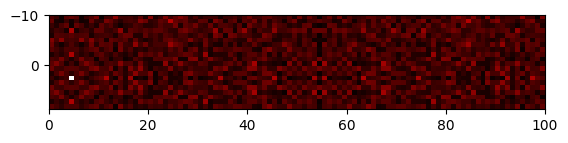

TDOA and FDOA (in samples)  =  ( 3 ,  4 )
max_index =  (13, 4)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt


f = np.random.randn(100)
g = np.roll(f, shift=4) # time shift
G = np.roll(np.fft.fft(g), shift = 3) # frequency shift in Fourier space
g = np.fft.ifft(G) # frequency and time shifted

len_f = len(f)
len_g = len(g)

# this is the largest delay we can have
max_freq= len_f

caf = []
freq_range = np.arange(-10, 10)

F = np.fft.fft(f)
G = np.fft.fft(g)

for freq in freq_range:
  # calculate the frequency shift
  shifted_signal2 = np.roll(G, -freq)
  caf.append(np.fft.ifft(np.conjugate(F) * shifted_signal2))


plt.imshow(abs(np.array((caf))), cmap='hot', interpolation='none', extent =[0, len(f), freq_range.max(), freq_range.min()])
plt.show()

caf = np.array(caf)
index = np.unravel_index(caf.argmax(), caf.shape)
print("FDOA and TDOA (in samples)  = ", "(", freq_range[index[0]], ", ", index[1], ")")
print("max_index = ", index)